# 필수라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
from IPython.display import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'D2coding')
mpl.rc('axes', unicode_minus = False)

sns.set(font = 'D2coding', rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize = (10, 8))

warnings.filterwarnings('ignore')

# 데이터 로딩

In [2]:
data = pd.read_csv('C:/k_digital/source/data/spam.csv')
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 탐색적 데이터 분석 : EDA

    [자주 사용하는 문자 클래스]
    [0-9] 또는 [a-zA-Z] 등은 무척 자주 사용하는 정규 표현식이다. 이렇게 자주 사용하는 정규식은 별도의 표기법으로 표현할 수 있다. 다음을 기억해 두자.

    \d - 숫자와 매치, [0-9]와 동일한 표현식이다.
    \D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.
    \s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.
    \S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
    \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
    \W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.

## target : 목표변수 or 종속변수

In [3]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

- spam : 스팸 문자, ham : 스팸이 아닌 문자
- NLTK(Natural Language Toolkit) : 자연어 처리를 위해 만든 도구(패키지)
- 주요기능 : 말뭉치, 토큰 생성, 형태소 분석, 품사 태깅

In [43]:
data['target'].value_counts() # 샘플에 편향이 있다. 

0    4827
1     747
Name: target, dtype: int64

## 말뭉치(corpus)
- 자연어 분석을 위해 만든 샘플 문서 집합

In [4]:
import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\admin\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
# gutenberg 말뭉치 : 저작권이 만료된 소설같은 작품들을 가지고 있는 문서 집합
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [7]:
shakespeare = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
print(shakespeare[:1000])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.

  Mar. Holla Barnardo

   Bar. Say, what is Horatio there?
  Hor. A peece of

## 토큰 생성 : 문자열을 가장 작은 단위인 토큰으로 나누는 작업

In [8]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(shakespeare[:1000]))

['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?", 'Fran.', 'Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar.', 'Long liue the King\n\n   Fran.', 'Barnardo?', 'Bar.', 'He\n\n   Fran.', 'You come most carefully vpon your houre\n\n   Bar.', "'Tis now strook twelue, get thee to bed Francisco\n\n   Fran.", "For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn.", 'Haue you had quiet Guard?', 'Fran.', 'Not a Mouse stirring\n\n   Barn.', 'Well, goodnight.', 'If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.', 'Enter Horatio and Marcellus.', 'Fran.', 'I thinke I heare them.', "Stand: who's there?", 'Hor.', 'Friends to this ground\n\n   Mar.', 'And Leige-men to the Dane\n\n   Fran.', 'Giue you good night\n\n   Mar.', "O farwel honest Soldier, who hath relieu'd you?", 'Fra.', "Barnardo ha's my place: giue you go

In [9]:
from nltk.tokenize import word_tokenize
print(word_tokenize(shakespeare[50:100]))

['9', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'a']


In [10]:
from nltk.tokenize import RegexpTokenizer
# \w : 영문자, 숫자, _(밑줄)
re = RegexpTokenizer('[\w]+')
re.tokenize(shakespeare[50:100])

['9', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'a']

## 형태소(morpheme)분석

- 형태소 : 의미가 있는 가장 작은 말의 단위
- 형태소 분석 : 단어에서 어근, 접두사, 접미사, 품사 같은 속성을 파악하는 작업
- 기능
    1. 어간 추출(stemming) : 단어의 기본형
    2. 원형 복원(lemmatizing) : 같은 의미를 가진 여러 단어를 통합하는 작업
    3. 품사 부착(Part-Of-Speech tagging, POS)

In [11]:
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

st1 = PorterStemmer()
st2 = LancasterStemmer()
lm = WordNetLemmatizer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print('Poter Stemmer : ', [st1.stem(w) for w in words])
print('Lancaster Stemmer : ', [st2.stem(w) for w in words])
print('WordNet Lemmatizer : ', [lm.lemmatize(w, pos='v') for w in words])

Poter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


WordNet Lemmatizer :  ['fly', 'fly', 'fly', 'fly', 'fly']


In [12]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [13]:
from  nltk.tag import pos_tag

text = '''Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence'''

tag_list = pos_tag(word_tokenize(text))
tag_list

[('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN')]

In [14]:
nouns_list = [t[0] for t in tag_list if t[1] == 'NN']
nouns_list

['handsome', 'clever', 'home', 'disposition', 'existence']

# 전처리

## 특수문자(특수기호) 제거

In [15]:
# 파이썬에 내장된 패키지 string은 문자열을 처리하는 다양한 함수를 제공한다.
import string 

In [16]:
# 특수기호 목록을 확인
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
sample = data['text'].loc[0]
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [18]:
# 한글자씩 출력
for i in sample:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [19]:
# 특수문자를 제외하고 출력
str = ''
for i in sample:
    if i not in string.punctuation:
        str += i
        
str

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [20]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
new_text = []
for i in sample:
    if i not in string.punctuation:
        new_text.append(i)
        
new_text

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [22]:
s = ['a', 'p', 'p', 'l', 'e']
''.join(s)

'apple'

In [23]:
# 문장형태
new_sample = []
for i in sample:
    if i not in string.punctuation:
        new_sample.append(i)
new_sample = ''.join(new_sample)
new_sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [24]:
def remove_punc(x):
    new_sample = []
    for i in x:
        if i not in string.punctuation:
            new_sample.append(i)
    new_sample = ''.join(new_sample)
    return new_sample

In [25]:
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [26]:
remove_punc(sample)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [27]:
data['text'] = data['text'].apply(remove_punc)

In [28]:
data

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will 체 b going to esplanade fr home
5571,ham,Pity was in mood for that Soany other suggest...
5572,ham,The guy did some bitching but I acted like id ...


## 전처리 - 불용어(stopword)

- 불용어 : 자연어 분석을 할 때 분석에 의미가 없는 단어
- 불용어 사전 : nltk

In [29]:
# 불용어 목록 확인
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [32]:
sample = data['text'].loc[0]
sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [33]:
sample.split() # 문장이 단어 단위로 분리

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [34]:
for w in sample.split():
    if w.lower() not in stopwords.words('english'): # 불용어가 아니라면
        print(w.lower())

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [35]:
new_sample = []
for w in sample.split():
    if w.lower() not in stopwords.words('english'): # 불용어가 아니라면
        new_sample.append(w.lower())
new_sample = ' '.join(new_sample)
new_sample

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [36]:
def stop_words(x):
    new_sample = []
    for w in x.split():
        if w.lower() not in stopwords.words('english'): # 불용어가 아니라면
            new_sample.append(w.lower())
    new_sample = ' '.join(new_sample)
    return new_sample

In [37]:
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u 짙750 pound prize ...
5570                          체 b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## 전처리 - 정형화 처리(target)

In [38]:
sample = pd.Series(['a', 'b', 'c'])
# map()
# zip()
sample.map({'a':'apple', 'b':'banana', 'c':'candy'})

0     apple
1    banana
2     candy
dtype: object

In [39]:
data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

## 카운트 기반의 벡터화 처리

- 카운트 기반 벡터화 : 문자를 개수 기반으로 벡터화하는 방식
- 데이터 전체에 존재하는 모든 단어들을 사전처럼 모은 다음에 각각의 인덱스를 부여하고, 문장마다 속한 단어가 있는 인덱스를 카운트하는 방식이다.

In [40]:
X = data['text']
y = data['target']

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
# 객체 생성
cv = CountVectorizer()
# 모델 학습
cv.fit(X)
# 단어와 인덱스 출력
# 모델 파라미터 : 모델이 만들어진 이후에 생성된 변수
cv.vocabulary_

{'go': 3769,
 'jurong': 4671,
 'point': 6416,
 'crazy': 2471,
 'available': 1379,
 'bugis': 1848,
 'great': 3866,
 'world': 9171,
 'la': 4831,
 'buffet': 1846,
 'cine': 2186,
 'got': 3826,
 'amore': 1146,
 'wat': 8933,
 'ok': 5978,
 'lar': 4870,
 'joking': 4639,
 'wif': 9066,
 'oni': 6010,
 'free': 3555,
 'entry': 3137,
 'wkly': 9123,
 'comp': 2302,
 'win': 9080,
 'fa': 3274,
 'cup': 2527,
 'final': 3399,
 'tkts': 8366,
 '21st': 433,
 'may': 5318,
 '2005': 420,
 'text': 8201,
 '87121': 840,
 'receive': 6816,
 'questionstd': 6708,
 'txt': 8578,
 'ratetcs': 6760,
 'apply': 1232,
 '08452810075over18s': 71,
 'dun': 2988,
 'say': 7176,
 'early': 3008,
 'hor': 4200,
 'already': 1119,
 'nah': 5665,
 'dont': 2894,
 'think': 8277,
 'goes': 3783,
 'usf': 8727,
 'lives': 5033,
 'around': 1283,
 'though': 8296,
 'freemsg': 3563,
 'hey': 4095,
 'darling': 2591,
 'weeks': 8988,
 'word': 9157,
 'back': 1431,
 'id': 4321,
 'like': 4983,
 'fun': 3630,
 'still': 7843,
 'tb': 8131,
 'xxx': 9296,
 'std': 

In [42]:
X = cv.transform(X)
print(X)
# (행인덱스, 인덱스)  갯수

  (0, 1146)	1
  (0, 1379)	1
  (0, 1846)	1
  (0, 1848)	1
  (0, 2186)	1
  (0, 2471)	1
  (0, 3769)	1
  (0, 3826)	1
  (0, 3866)	1
  (0, 4671)	1
  (0, 4831)	1
  (0, 6416)	1
  (0, 8933)	1
  (0, 9171)	1
  (1, 4639)	1
  (1, 4870)	1
  (1, 5978)	1
  (1, 6010)	1
  (1, 9066)	1
  (2, 71)	1
  (2, 420)	1
  (2, 433)	1
  (2, 840)	1
  (2, 1232)	1
  (2, 2302)	1
  :	:
  (5570, 3165)	1
  (5570, 3542)	1
  (5570, 3788)	1
  (5570, 4166)	1
  (5571, 5549)	1
  (5571, 6342)	1
  (5571, 7594)	1
  (5571, 7970)	1
  (5572, 964)	1
  (5572, 1632)	1
  (5572, 1883)	1
  (5572, 3080)	1
  (5572, 3555)	1
  (5572, 3679)	1
  (5572, 3928)	1
  (5572, 4321)	1
  (5572, 4458)	1
  (5572, 4983)	1
  (5572, 5760)	1
  (5572, 7619)	1
  (5572, 8717)	1
  (5572, 8983)	1
  (5573, 5671)	1
  (5573, 7036)	1
  (5573, 8524)	1


In [44]:
# 0번째 행의 데이터 확인 
data.text[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [45]:
# 'go'의 인덱스 확인
print(cv.vocabulary_['go'])

3769


In [46]:
# 'jorong'의 인덱스 확인
print(cv.vocabulary_['jurong'])

4671


In [47]:
# 'point'의 인덱스 확인
print(cv.vocabulary_['point'])

6416


# 모델링 및 예측/평가

## 훈련세트와 테스트세트로 분리

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

## MultinomialNB : 다항 분포에 대한 나이브 베이스 알고리즘 

- 정규분포(Gaussian)
- 베르누이분포(Bernoulli)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

# 평가지표 분류
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.
          format(accuracy, precision, recall, f1, roc_auc))

# 재현율과 정밀도의 시각화
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (10, 7))
    plt.rc('font', family = 'D2coding')
    threshold_boundary = thresholds.shape[0]
    a = thresholds[precisions[0:threshold_boundary] == recalls[0:threshold_boundary]]
    loc = np.where(thresholds == a[0])[0][0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    plt.scatter(thresholds[loc], precisions[loc], c = 'black', s = 60)
    plt.text(0.02 + thresholds[loc], precisions[loc], '임계값 : {:.3f}'.format(thresholds[loc]), size = 15)
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2), size = 15)
    plt.xlabel('Threshold value', size = 15); plt.ylabel('Precision and Recall value', size = 15)
    plt.legend()
    plt.rc('legend', fontsize = 15)
    plt.rc('ytick', labelsize = 15)
    plt.show()
    

# 임계값 조정 함수
def get_clf_eval_thres(y_test, pred_po, threshold, f1_show=False, auc_show=False):
    eval_df = pd.DataFrame()
    
    for thres in threshold:
        # threshold에 따른 예측 분류 값
        binarizer = Binarizer(threshold = thres)
        binarizer.fit(pred_po)
        thres_pred = binarizer.transform(pred_po)
        
        # 평가지표  
        accuracy = accuracy_score(y_test, thres_pred)
        precision = precision_score(y_test, thres_pred)
        recall = recall_score(y_test, thres_pred)
        f1 = f1_score(y_test, thres_pred)
        auc = roc_auc_score(y_test, pred_po)
        
        # 데이터 프레임 형태
        eval_lst = np.array([accuracy, precision, recall, f1, auc]).reshape(-1,1)
        temp = pd.DataFrame(eval_lst, columns=[thres], 
                            index = ["정확도", "정밀도", "재현율", "F1스코어", "AUC"])
        eval_df = pd.concat([eval_df,temp], axis=1)
        
    eval_df.columns.names = ["임계값"]
    
    if f1_show == False:
        eval_df.drop("F1스코어", axis=0, inplace=True)
        
    if auc_show == False:
        eval_df.drop("AUC", axis=0, inplace=True)
        
    return round(eval_df, 4)

In [57]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]

In [58]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[965  12]
 [  4 134]]
정확도 : 0.9857, 정밀도 : 0.9178, 재현율 : 0.9710, F1 : 0.9437, AUC : 0.9949


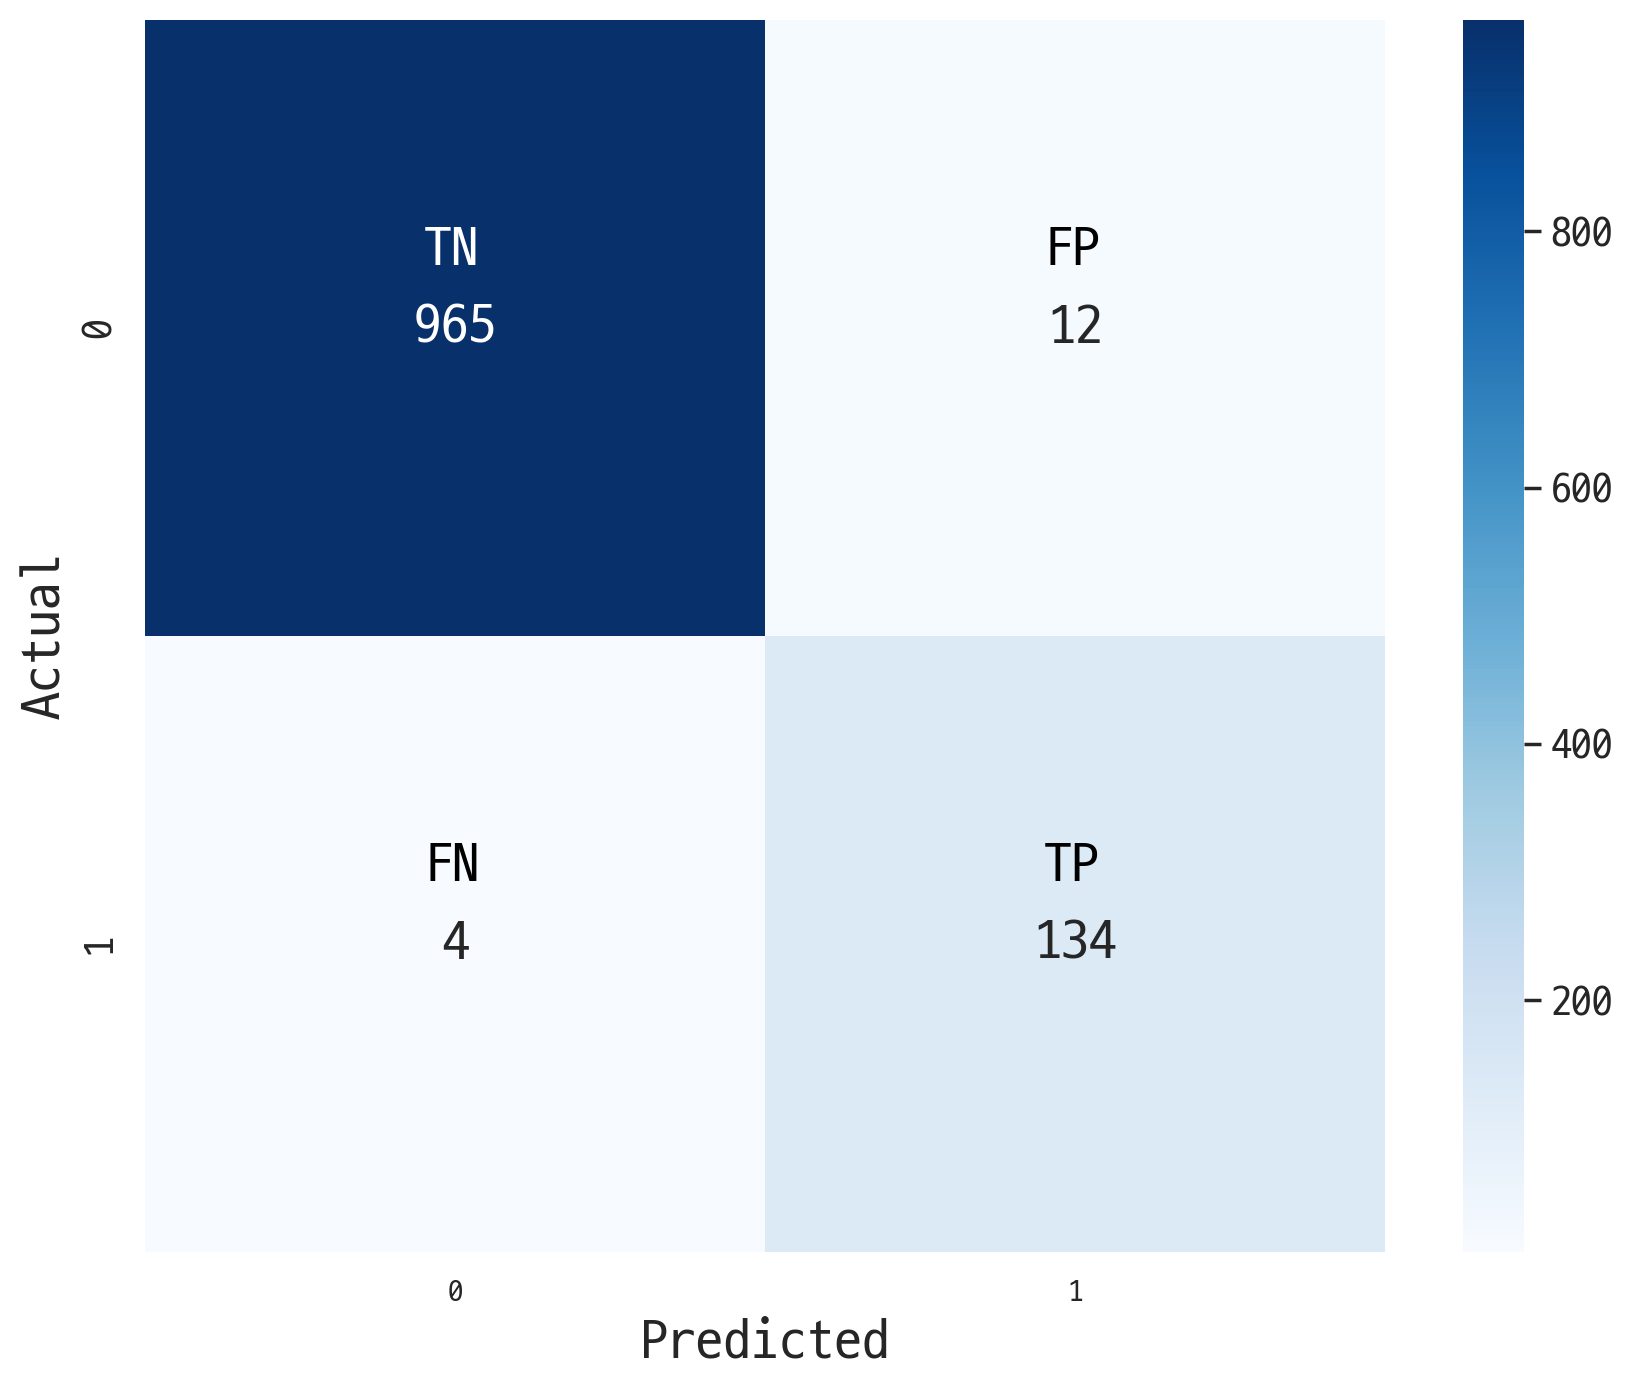

In [92]:
# 혼돈 행렬 시각화
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, annot_kws = {'size':20}, fmt = '0.0f', cmap='Blues')
plt.xlabel('Predicted', size = 20)
plt.ylabel('Actual', size = 20)
plt.text(0.45, 0.4, 'TN', color = 'w', fontsize = 20)
plt.text(1.45, 0.4, 'FP', color = 'black', fontsize = 20)
plt.text(0.45, 1.4, 'FN', color = 'black', fontsize = 20)
plt.text(1.45, 1.4, 'TP', color = 'black', fontsize = 20)
plt.show()

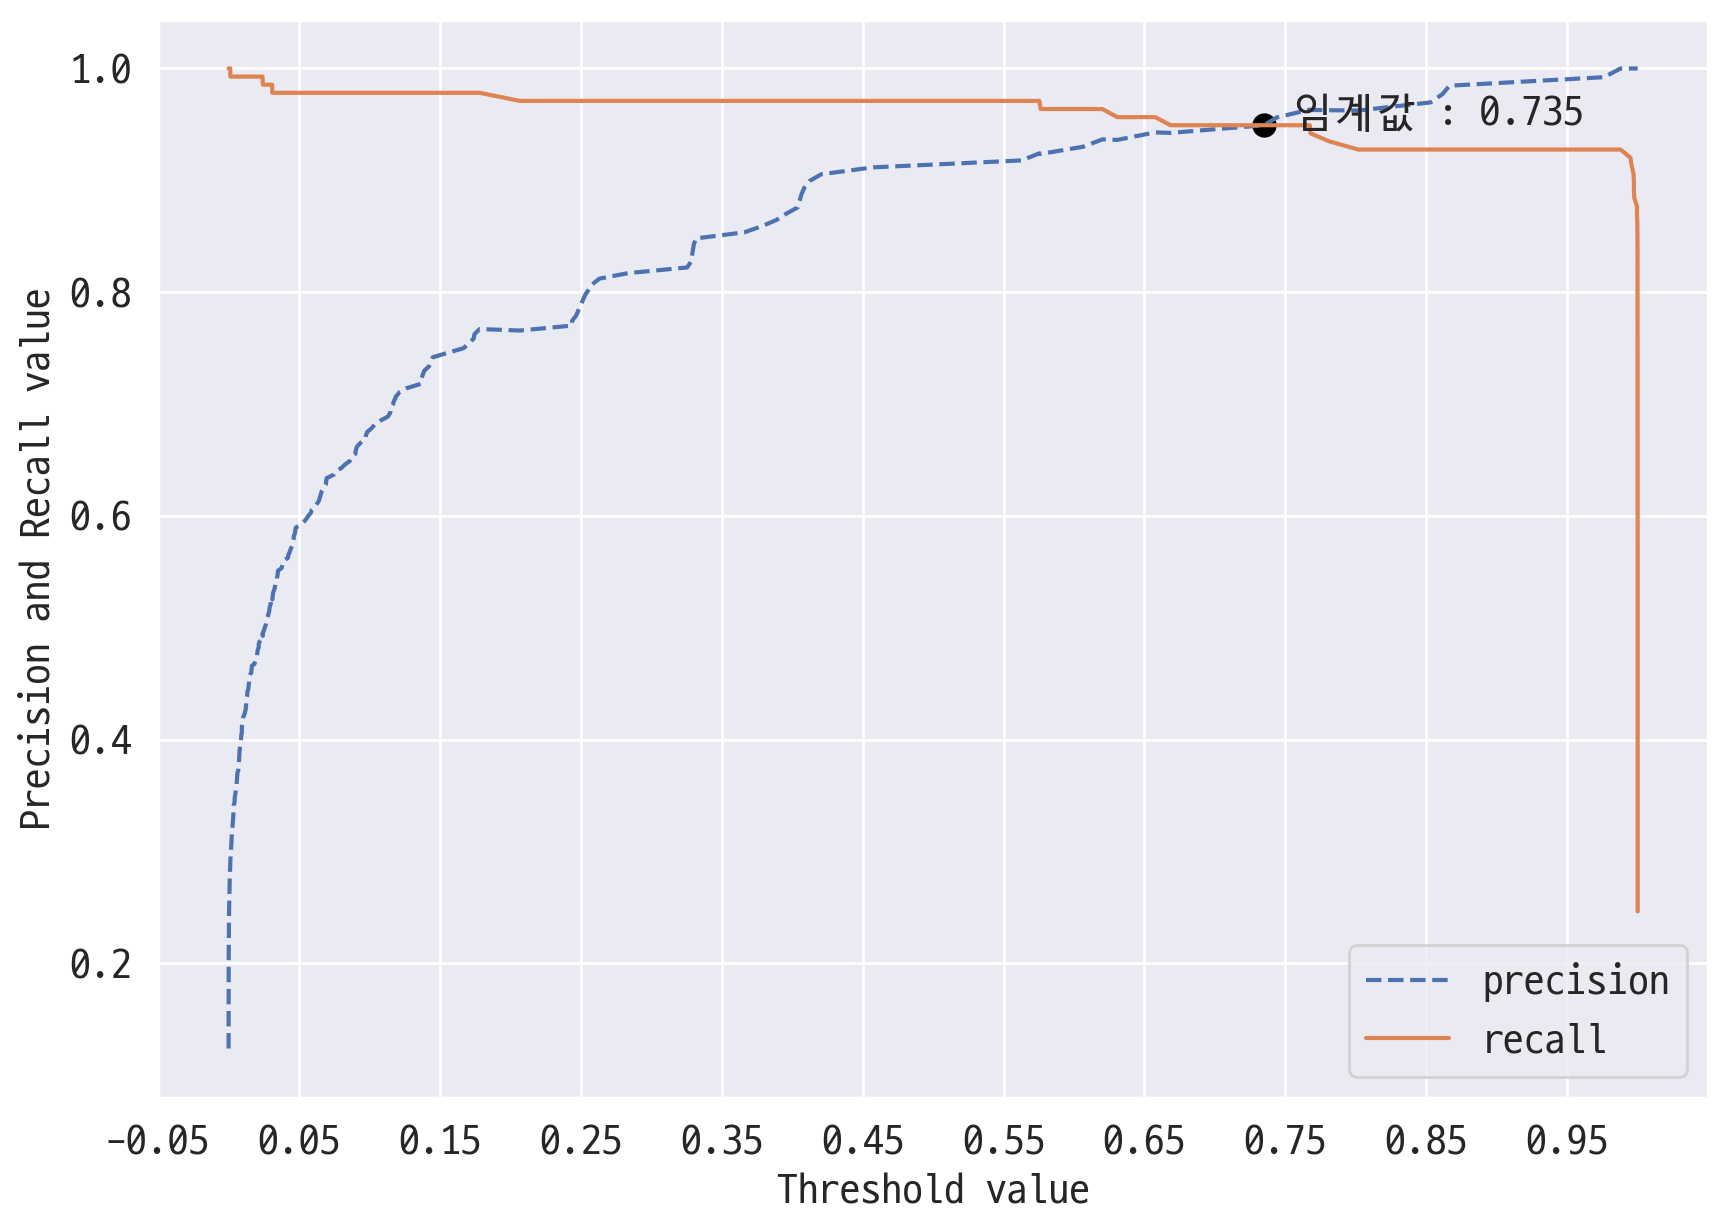

In [66]:
# 정밀도와 재현율 곡선
precision_recall_curve_plot(y_test, pred_proba)

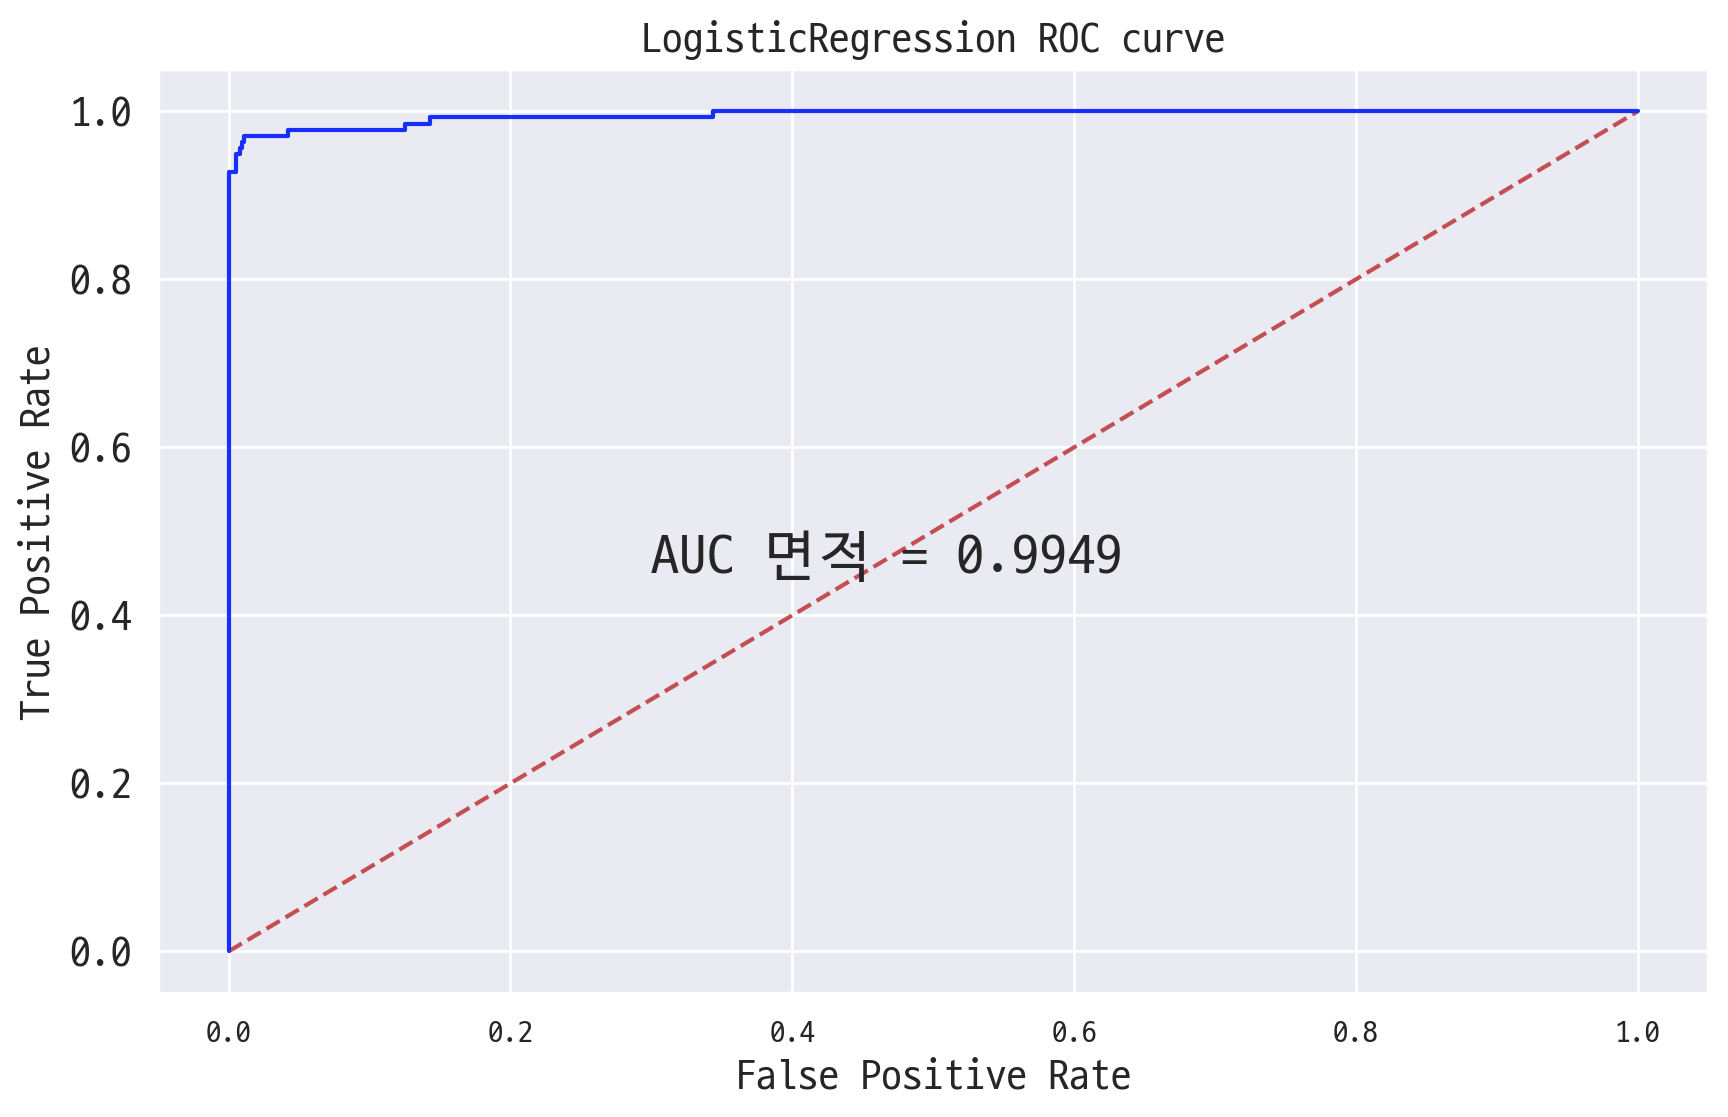

In [91]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 6))
plt.plot([0,1], [0,1], "r--")
plt.plot(fpr, tpr, label='LogisticRegression', color = '#162fff')
plt.xlabel('False Positive Rate', size = 15)
plt.ylabel('True Positive Rate', size = 15)
plt.title('LogisticRegression ROC curve', size = 15)
plt.text(0.3, 0.45, 'AUC 면적 = {}'.format(round(roc_auc_score(y_test, pred_proba), 4)), size = 20)
plt.show()